In [ ]:
#OK

In [3]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [4]:
@model st_f_pnt begin
    @parameter begin
        d_Fr_chair=6634
        k_Fr_chair=1000000
        z_k_Fr_chair_ini=0.00082722
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "ST_F_PNT") 
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "F-nl7qfxtguJmQuIZ3vi-19", "parent" => "F-nl7qfxtguJmQuIZ3vi-15", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "pe2Z3EVLAYxKsAHty0Ld-10", "parent" => "pe2Z3EVLAYxKsAHty0Ld-5", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "pe2Z3EVLAYxKsAHty0Ld-9", "parent" => "pe2Z3EVLAYxKsAHty0Ld-5", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\">

st_f_pnt (generic function with 1 method)

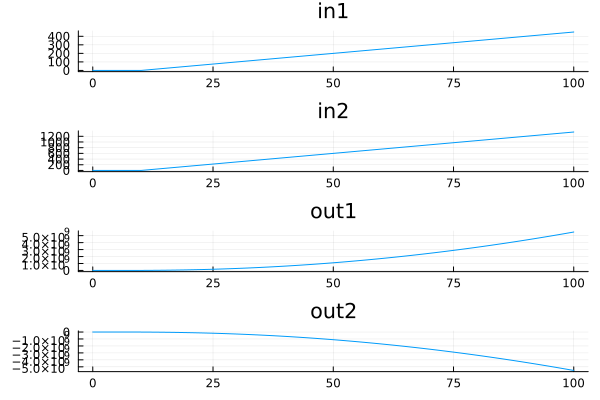

In [5]:
@model TestSt_f_pnt begin


    @block begin
        p = st_f_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.v_HM_BD_F2ST_F_mps
        ramp2.out => p.v_VL2ST_F_mps
    end
    @scope begin
        p.v_HM_BD_F2ST_F_mps => v_HM_BD_F2ST_F_mps
        p.v_VL2ST_F_mps => v_VL2ST_F_mps
        p.F_ST_F2HM_F_N => F_ST_F2HM_F_N
        p.F_ST_F2VL_N => F_ST_F2VL_N
    end
end
m = @compile TestSt_f_pnt()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))